In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./datasets/PRSA_data_2010.1.1-2014.12.31.csv')
df.shape

(43824, 13)

In [4]:
df = df.set_index('No')
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
df['pm2.5'] = df['pm2.5'].fillna(df['pm2.5'].mean())

In [6]:
df.dtypes

year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [7]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0


In [8]:
df.shape

(43824, 12)

In [9]:
df = df.drop(columns=['year','PRES', 'DEWP', 'Ir', 'Is', 'cbwd', 'Iws', 'day'])
#df = df.drop(columns=['cbwd'])

In [10]:
df.head()

,month,hour,pm2.5,TEMP
No,,,,
1,1,0,98.613215,-11.0
2,1,1,98.613215,-12.0
3,1,2,98.613215,-11.0
4,1,3,98.613215,-14.0
5,1,4,98.613215,-12.0


In [11]:
df_roll = df.rolling(window=24).mean()

In [12]:
df_roll.columns = ['month_', 'hour_', 'pm2.5_', 'TEMP_']

In [13]:
df_con = pd.concat((df, df_roll), axis=1 ).dropna()
df_con.head()

,month,hour,pm2.5,TEMP,month_,hour_,pm2.5_,TEMP_
No,,,,,,,,
24,1,23,98.613215,-5.0,1.0,11.5,98.613215,-6.750000
25,1,0,129.000000,-4.0,1.0,11.5,99.879331,-6.458333
26,1,1,148.000000,-4.0,1.0,11.5,101.937113,-6.125000
27,1,2,159.000000,-5.0,1.0,11.5,104.453229,-5.875000
28,1,3,181.000000,-5.0,1.0,11.5,107.886012,-5.500000


In [14]:
x = df_con.iloc[:-1]
y = df_con.iloc[1:]['pm2.5']

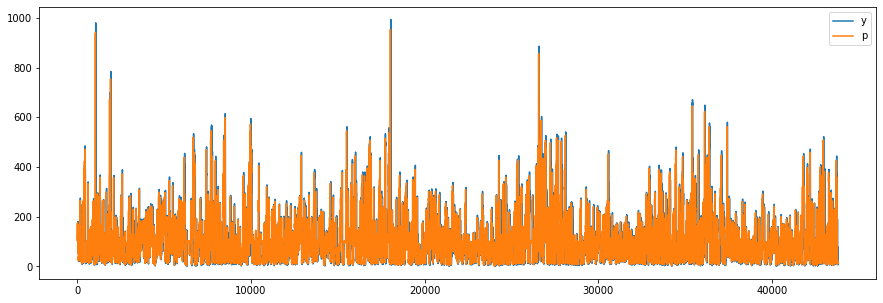

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)
model.score(x, y)
plt.figure(figsize=(15, 5))
plt.plot(y, label='y')
plt.plot(model.predict(x), label='p')
plt.legend()

In [16]:
data = df_con[:1000]
T=24
x_list=[]
y_list=[]
for i in range(len(data) - T*24):
    x = df_con.iloc[i: i+T] # 5는 포함을 안한다
    y = df_con.iloc[i+T*2]['pm2.5']
    x_list.append(x)
    y_list.append(y)
len(x_list), len(y_list)

(424, 424)

In [17]:
X = np.stack(x_list, 0).astype(np.float32)
y = np.stack(y_list, 0).astype(np.float32).reshape([-1, 1])
type(X), X.shape, y.shape, X.dtype, y.dtype

(numpy.ndarray, (424, 24, 8), (424, 1), dtype('float32'), dtype('float32'))

In [18]:
np.max(X), np.max(y)

(485.0, 485.0)

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 정규화 (3d -> 2d -> 3d)
X_2d = X.reshape([-1, 8])
scaler_x = MinMaxScaler().fit(X_2d)
scaler_y = MinMaxScaler().fit(y)
xn = scaler_x.transform(X_2d)
yn = scaler_y.transform(y)
xn = xn.reshape([424, 24, -1])
xn.shape, np.min(xn), np.max(xn), np.min(yn), np.max(yn)


In [20]:
w1 = tf.Variable(tf.random_normal(shape=[8, 4])) ## x > hidden 784=28*28
b1 = tf.Variable(tf.random_normal(shape=[4]))
w2 = tf.Variable(tf.random_normal(shape=[4, 1])) ## hidden > h 
b2 = tf.Variable(tf.random_normal(shape=[1])) # 이진분류라서 1이라 했지만, 다중분류이면 k개 설정
## xn = x / tf.reduce_max(xn, -1, True)
out = tf.matmul(h1, w2)+b2
cost = tf.reduce_mean((y-out)**2)
train = tf.train.GradientDescentOptimizer(0.5).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.cast(y, tf.int64), tf.arg_max(out, -1)), tf.float32))
sess = tf.Session()
sess.run(tf.global_variables_initializer())

NameError: name 'h1' is not defined